# Correlation Study Notebook
## Objectives
- Answer business requirement 1:
    - The client is interested in discovering how the house attributes correlate with the sale price.

## Inputs
- outputs/datasets/cleaned/HousePricesCleaned.csv

## Outputs
- Generate code that answers business requirement 1 and can be used to build Streamlit App
- Save plots in folder for documentation

## Conclusions
- The size of a property matters. Higher values of 1stFlrSF, GarageArea, GrLivArea, MasVnrArea, OpenPorchSF and TotalBsmtSF are associated with higher sale price.
- Time matters. Recently built houses, and houses with recently built garages and recently added remodel have higher sale prices.
- Quality matters. Houses with higher overall quality and kitchen quality ratings have higher sale prices.

---

# Change working directory
We need to change the working directory from its current folder to its parent folder

In [1]:
import os

current_path = os.getcwd()
os.chdir(os.path.dirname(current_path))
current_path = os.getcwd()
current_path

'/workspace/CI_PP5'

# Load Cleaned Data

In [56]:
import pandas as pd
TrainSet = pd.read_csv("outputs/datasets/cleaned/TrainSetCleaned.csv")
TrainSet.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,0.0,3.0,Av,48,0,1774,774,Unf,2007.0,...,11694,90.0,452.0,108,5,9,1822,2007,2007,314813
1,894,0.0,2.0,No,0,Unf,894,308,0,1962.0,...,6600,60.0,0.0,0,5,5,894,1962,1962,109500
2,964,0.0,2.0,No,713,ALQ,163,432,Unf,1921.0,...,13360,80.0,0.0,0,7,5,876,1921,2006,163500
3,1689,0.0,3.0,No,1218,GLQ,350,857,RFn,2002.0,...,13265,69.0,148.0,59,5,8,1568,2002,2002,271000
4,1541,0.0,3.0,No,0,Unf,1541,843,RFn,2001.0,...,13704,118.0,150.0,81,5,7,1541,2001,2002,205000


# Data Exploration

In [ ]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

## Correlation and PPS Analysis
We need to find the correlation between different features and the sales price. Let's start by 

## Pearson Correlation

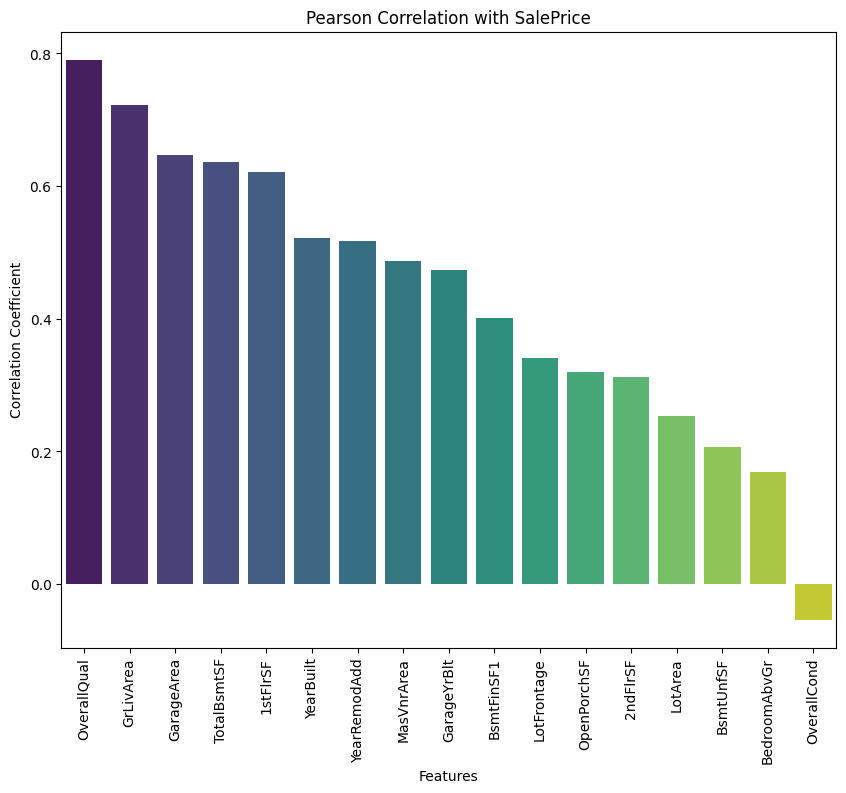

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

pearson_corr = TrainSet.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)

# Exlude the SalePrice correlation with itself
pearson_corr = pearson_corr.drop('SalePrice')

plt.figure(figsize=(10, 8))
sns.barplot(x=pearson_corr.index, y=pearson_corr.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Pearson Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

plt.show()

## Spearman Correlation

Text(0, 0.5, 'Correlation Coefficient')

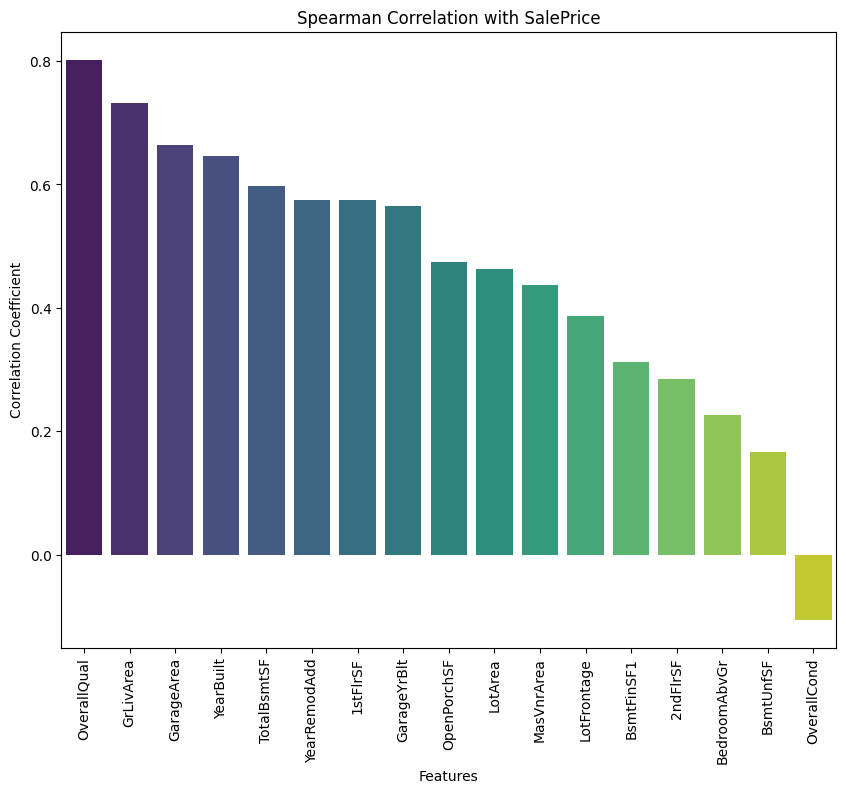

In [52]:
spearman_corr = TrainSet.corr(method='spearman')['SalePrice'].sort_values(ascending=False)

# Exlude the SalePrice correlation with itself
spearman_corr = spearman_corr.drop('SalePrice')

plt.figure(figsize=(10, 8))
sns.barplot(x=spearman_corr.index, y=spearman_corr.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Spearman Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')

## Comparing results.
Both the Pearson and the Spearman correlations gives ut almost the same results, 


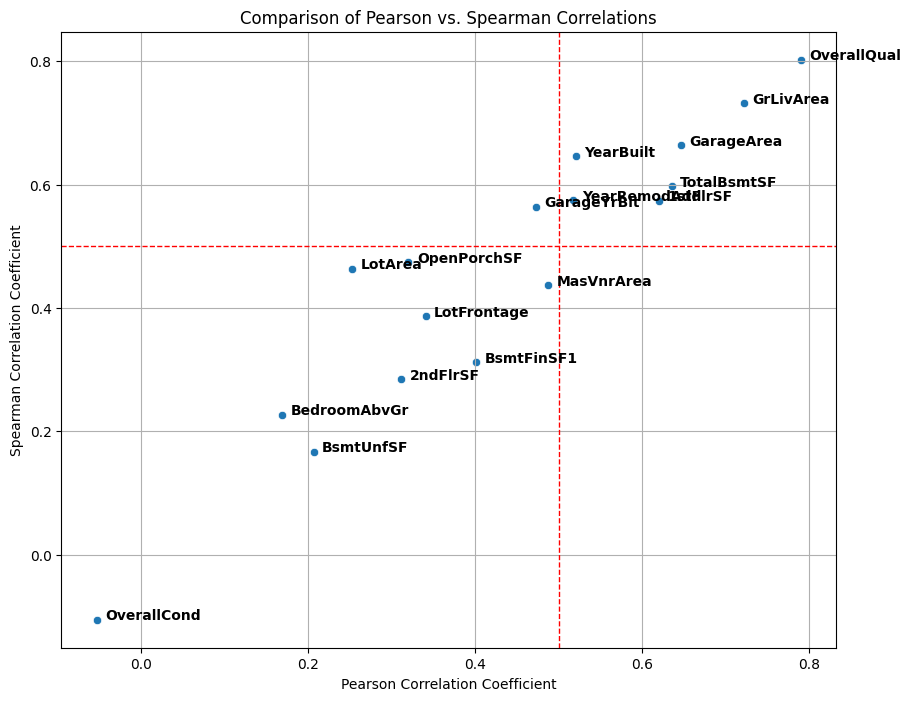

In [54]:
correlation_comparison = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Pearson', y='Spearman', data=correlation_comparison)
plt.title('Comparison of Pearson vs. Spearman Correlations')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Spearman Correlation Coefficient')

plt.axhline(0.5, color='red', linestyle='--', linewidth=1)
plt.axvline(0.5, color='red', linestyle='--', linewidth=1)

for line in range(0, correlation_comparison.shape[0]):
    plt.text(correlation_comparison.Pearson[line]+0.01, correlation_comparison.Spearman[line], 
             correlation_comparison.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.grid(True)
plt.show()

In [ ]:
# Select features with a Pearson correlation above 0.5
pearson_features = df_pearson_train[abs(df_pearson_train) > 0.5]
spearman_features = df_spearman_train[abs(df_spearman_train) > 0.5]

# Print selected features
print("Selected features based on Pearson correlation:", pearson_features.index.tolist())
print("Selected features based on Spearman correlation:", spearman_features.index.tolist())

Pearson correlation: 
'OverallQual'
'GrLivArea'
'GarageArea'
'TotalBsmtSF'
'1stFlrSF'
'YearBuilt'
'YearRemodAdd'

Spearman correlation:
OverallQual'
'GrLivArea'
'GarageArea'
'YearBuilt'
'TotalBsmtSF'
'YearRemodAdd'
'1stFlrSF'
'GarageYrBlt'

Seems like we are missing some data... I need to go back to the Data Cleaning notebook.